In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [11]:
configPath = "./config/yolo-config/yolov4-tiny_custom.cfg"
weightsPath = "./config/yolo-config/yolov4-tiny_custom_4000.weights"
labelsPath = "./config/yolo-config/obj.names"

In [44]:
imagePath = "./data/images/test_1.jpg"

In [13]:
yolo = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

In [ ]:
cv2.dnn.readNetFromTensorflow()

In [14]:
labels = open(labelsPath).read().strip().split("\n")
print(labels)

['child', 'adult']


In [15]:
np.random.seed(42)
colors = np.random.randint(0, 255, size=(len(labels), 3), dtype="uint8")
print(colors)

[[102 220 225]
 [ 95 179  61]]


In [45]:
image = cv2.imread(imagePath)

(H, W) = image.shape[:2]

default_confidence = 0.5
default_threshold = 0.3

ln = yolo.getLayerNames()
ln = [ln[i - 1] for i in yolo.getUnconnectedOutLayers()]

blob = cv2.dnn.blobFromImage(
        image, 1/255.0, (406, 406), swapRB=True, crop=False)

yolo.setInput(blob)
layerOutputs = yolo.forward(ln)

boxes, confidences, classIds = [], [], []

for output in layerOutputs:
  for detection in output:
      scores = detection[5:]
      classID = np.argmax(scores)
      confidence = scores[classID]

      if confidence > default_confidence:
          box = detection[0:4] * np.array([W, H, W, H])
          (center_x, center_y, width, height) = box.astype("int")

          x = int(center_x - (width / 2))
          y = int(center_y - (height / 2))

          boxes.append([x, y, int(width), int(height)])
          confidences.append(float(confidence))
          classIds.append(classID)

idxs = cv2.dnn.NMSBoxes(boxes, confidences, default_confidence, default_threshold)

if len(idxs) > 0:
	for i in idxs.flatten():
		(x, y) = (boxes[i][0], boxes[i][1])
		(w, h) = (boxes[i][2], boxes[i][3])
		color = [int(c) for c in colors[classIds[i]]]
		cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
		text = "{}: {:.4f}".format(labels[classIds[i]], confidences[i])
		cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
			0.5, color, 2)

In [47]:
for i in idxs.flatten():
  print(i)
  print(classIds)
  print(classIds[i])
  print(labels)
  print(labels[classIds[i]])
  print("----------")
		

0
[1, 1, 0]
1
['child', 'adult']
adult
----------
2
[1, 1, 0]
0
['child', 'adult']
child
----------


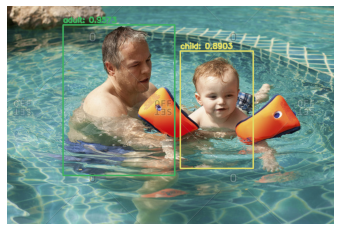

In [46]:
imageToPlot = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(imageToPlot)
plt.show()